In [1]:
import pandas as pd
import glob
import os
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import re
from gensim.models.coherencemodel import CoherenceModel

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirs=["2020-11","2020-12","2021-01","2021-02"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_vader/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 672/672 [00:13<00:00, 48.76it/s] 


In [4]:
data_first_wave = pd.concat(li, axis=0, ignore_index=True)
data_first_wave.head()

,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2020-10-31 23:59:54+00:00,"Halloween is my favorite holiday, but today th...","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou..."
1,1,2020-10-31 23:59:54+00:00,RT The graphics in this article are excellent-...,"{'neg': 0.075, 'neu': 0.678, 'pos': 0.247, 'co..."
2,2,2020-10-31 23:59:54+00:00,Trick or Treats with my son who I don't see o...,"{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'comp..."
3,3,2020-10-31 23:59:54+00:00,Like Bill Gates and Steve Jobs: Competition in...,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
4,4,2020-10-31 23:59:55+00:00,"RT ""Since when have children's clothes been no...","{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'comp..."


In [5]:
dirs=["2021-12","2022-01"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_vader/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 744/744 [00:13<00:00, 54.31it/s] 


In [6]:
data_second_wave = pd.concat(li, axis=0, ignore_index=True)
data_second_wave.tail()

,Unnamed: 0,created_at,full_text,sentiment_score
227628,167,2022-01-31 22:00:00+00:00,I'm sure you will be covering this and the oth...,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp..."
227629,168,2022-01-31 22:00:00+00:00,More like they made her leave because she woul...,"{'neg': 0.086, 'neu': 0.715, 'pos': 0.2, 'comp..."
227630,169,2022-01-31 22:00:00+00:00,"RT My wise and funny Dad, Ranjith Chandrapala,...","{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
227631,170,2022-01-31 22:00:00+00:00,Thank you for attending the webinar for #journ...,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
227632,171,2022-01-31 22:00:00+00:00,RT Thanks to everyone who's bought a copy of T...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp..."


In [7]:
# import numpy as np
# # data['created_at']=pd.to_datetime(data['created_at'])
# data['sentiment_score']
# data['created_at']
# # data['created_at']=pd.to_datetime(data['created_at'])
# # data.index[data['sentiment_score'] == "{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.5423}"].tolist()
# data['created_at'][228504]
# # data.index[data['sentiment_score']=='nan'].tolist()

In [8]:
# data['created_at'][228504]

In [9]:
data_first_wave=data_first_wave.drop('Unnamed: 0',axis=1)
data_second_wave=data_second_wave.drop('Unnamed: 0',axis=1)

In [10]:
print(data_first_wave.shape)
data_first_wave = data_first_wave[data_first_wave['full_text'].notna()]
data_first_wave.shape

(433347, 3)


(433339, 3)

In [11]:
print(data_second_wave.shape)
data_second_wave = data_second_wave[data_second_wave['full_text'].notna()]
data_second_wave.shape

(227633, 3)


(227631, 3)

In [12]:
def punctRemover(sentence):
    # list the different punctuations
    punctuations = '''\n!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in sentence:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [13]:
tweets_first_wave=data_first_wave['full_text']
tweets_second_wave=data_second_wave['full_text']
def urlRemover(sentence):
    pattern = r"http\S+"
    return re.sub(pattern,"",sentence)

new_tweets = []
for tweet in tweets_first_wave:
    new_tweets.append(urlRemover(punctRemover(tweet)))
data_first_wave['full_text']=new_tweets

new_tweets = []
for tweet in tweets_second_wave:
    new_tweets.append(urlRemover(punctRemover(tweet)))
data_second_wave['full_text']=new_tweets

In [14]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2022)
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

In [16]:
processed_tweets_first_wave = data_first_wave['full_text'].map(preprocess)
processed_tweets_second_wave = data_second_wave['full_text'].map(preprocess)

In [17]:
lexicon_first_wave = gensim.corpora.Dictionary(processed_tweets_first_wave)
bow_corpus_first_wave = [lexicon_first_wave.doc2bow(doc) for doc in processed_tweets_first_wave]

lexicon_second_wave = gensim.corpora.Dictionary(processed_tweets_second_wave)
bow_corpus_second_wave = [lexicon_second_wave.doc2bow(doc) for doc in processed_tweets_second_wave]

In [18]:
lda_model_first_wave = gensim.models.LdaMulticore(bow_corpus_first_wave, num_topics=3,id2word=lexicon_first_wave, passes=2, workers=2)

lda_model_second_wave = gensim.models.LdaMulticore(bow_corpus_second_wave, num_topics=3,id2word=lexicon_second_wave, passes=2, workers=2)

In [19]:
text = ""
text1 = ""
for idx, topic in lda_model_first_wave.print_topics(-1):
    t_list=topic.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    text+=" ".join(t_list)
    text+=" "
    print('Topic: {} \nWords: {}'.format(idx, topic))
print("\n\n")


for idx, topic in lda_model_second_wave.print_topics(-1):
    t_list=topic.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    text1+=" ".join(t_list)
    text1+=" "
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"covid" + 0.022*"pandemic" + 0.015*"people" + 0.015*"lockdown" + 0.011*"like" + 0.009*"dont" + 0.009*"mask" + 0.008*"home" + 0.008*"go" + 0.007*"school"
Topic: 1 
Words: 0.058*"covid" + 0.014*"coronavirus" + 0.014*"case" + 0.011*"health" + 0.009*"state" + 0.008*"say" + 0.008*"report" + 0.007*"deaths" + 0.007*"pandemic" + 0.005*"break"
Topic: 2 
Words: 0.049*"covid" + 0.021*"vaccine" + 0.012*"pandemic" + 0.009*"help" + 0.007*"vaccines" + 0.007*"test" + 0.006*"relief" + 0.006*"need" + 0.005*"work" + 0.005*"support"



Topic: 0 
Words: 0.033*"covid" + 0.022*"pandemic" + 0.009*"like" + 0.008*"people" + 0.008*"dont" + 0.008*"work" + 0.007*"home" + 0.006*"go" + 0.006*"time" + 0.006*"think"
Topic: 1 
Words: 0.053*"covid" + 0.023*"test" + 0.019*"omicron" + 0.015*"case" + 0.015*"mask" + 0.009*"positive" + 0.008*"wear" + 0.007*"report" + 0.007*"health" + 0.007*"variant"
Topic: 2 
Words: 0.049*"covid" + 0.030*"vaccine" + 0.013*"people" + 0.008*"say" + 0.008*"mandate" + 0.00

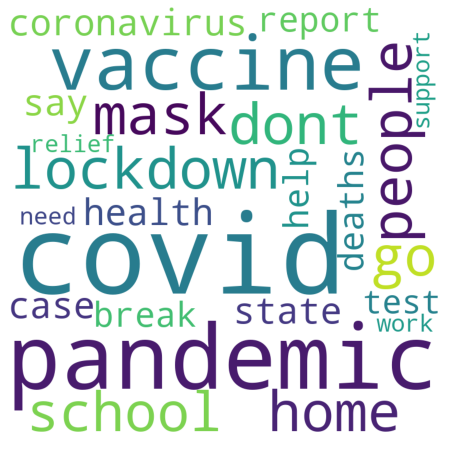

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

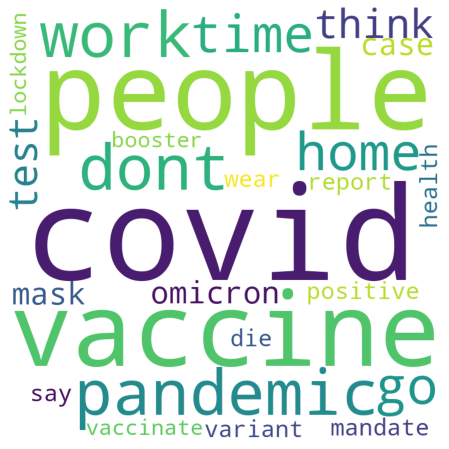

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 33.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b51662f9241874e5180fdbe055e8772846d42d83ee07982411359bb867ec2904
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c5424c50b4b6961147add5b7d2a32f51feffbc8fc2ef524abee2e83482e2ab8a
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [23]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model_first_wave, bow_corpus_first_wave, lexicon_first_wave)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [24]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.211367  0.105936       1        1  35.760043
2      0.002045 -0.208857       2        1  34.650763
1     -0.213412  0.102920       3        1  29.589194, topic_info=            Term           Freq          Total Category  logprob  loglift
941      vaccine   31714.000000   31714.000000  Default  30.0000  30.0000
84          case   18495.000000   18495.000000  Default  29.0000  29.0000
58         covid  183049.000000  183049.000000  Default  28.0000  28.0000
86   coronavirus   23184.000000   23184.000000  Default  27.0000  27.0000
40          like   16530.000000   16530.000000  Default  26.0000  26.0000
..           ...            ...            ...      ...      ...      ...
21         today    4358.573976   11285.063369   Topic3  -5.6829   0.2664
104       people    5530.238565   33572.881912   Topic3  -5.4448  -0.5857
77         biden    3827.795394    8765.956749   Topic3  -5.8127   0.3892
209        world    3524.919102    7438.859619   Topic3  -5.8952   0.4709
446        virus    3506.015049    8790.433456   Topic3  -5.9006   0.2986

[258 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1013      2  0.995015    access
1013      3  0.005105    access
1396      2  0.000786    accord
1396      3  0.998997    accord
76        1  0.998812  actually
...     ...       ...       ...
3524      3  0.993430     wuhan
198       1  0.999756      yall
22        1  0.467952      year
22        2  0.344140      year
22        3  0.187865      year

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [25]:
lda_viz1 = gensimvis.prepare(lda_model_second_wave, bow_corpus_second_wave, lexicon_second_wave)

In [26]:
lda_viz1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.191591 -0.086928       1        1  37.643018
1     -0.180695 -0.103664       2        1  31.673205
2     -0.010897  0.190592       3        1  30.683778, topic_info=        Term          Freq         Total Category  logprob  loglift
19   vaccine  20861.000000  20861.000000  Default  30.0000  30.0000
82      test  16235.000000  16235.000000  Default  29.0000  29.0000
0    omicron  13524.000000  13524.000000  Default  28.0000  28.0000
236     mask  10576.000000  10576.000000  Default  27.0000  27.0000
319     case  10679.000000  10679.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
533   deaths   2079.504593   5441.080813   Topic3  -5.7768   0.2196
806     time   2169.155167   9460.594249   Topic3  -5.7346  -0.2914
460    today   1936.102175   5212.651344   Topic3  -5.8482   0.1910
662    years   1917.499836   5115.313610   Topic3  -5.8579   0.2002
576      get   1868.709126   4952.729268   Topic3  -5.8837   0.2067

[270 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
436       2  0.997955  africa
436       3  0.001641  africa
2952      2  0.003243     age
2952      3  0.996486     age
726       1  0.006310    amid
...     ...       ...     ...
614       2  0.039928    year
614       3  0.299832    year
662       1  0.575527   years
662       2  0.049655   years
662       3  0.374757   years

[519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [27]:
coherence_model_lda_first_wave = CoherenceModel(model=lda_model_first_wave,texts=processed_tweets_first_wave,dictionary=lexicon_first_wave, coherence='u_mass')
coherence_lda_first_wave = coherence_model_lda_first_wave.get_coherence()
print('UMass Coherence Score for First Wave ', coherence_lda_first_wave)

coherence_model_lda_first_wave = CoherenceModel(model=lda_model_first_wave,texts=processed_tweets_first_wave,dictionary=lexicon_first_wave, coherence='c_v')
coherence_lda_first_wave = coherence_model_lda_first_wave.get_coherence()
print('CV Coherence Score for First Wave ', coherence_lda_first_wave)

coherence_model_lda_first_wave = CoherenceModel(model=lda_model_first_wave,texts=processed_tweets_first_wave,dictionary=lexicon_first_wave, coherence='c_uci')
coherence_lda_first_wave = coherence_model_lda_first_wave.get_coherence()
print('UCI Coherence Score for First Wave ', coherence_lda_first_wave)

UMass Coherence Score for First Wave  -3.6102245249450853
CV Coherence Score for First Wave  0.27068894280097017
UCI Coherence Score for First Wave  -0.07458269286331265


In [28]:
coherence_model_lda_second_wave = CoherenceModel(model=lda_model_second_wave,texts=processed_tweets_second_wave,dictionary=lexicon_second_wave, coherence='u_mass')
coherence_lda_second_wave = coherence_model_lda_second_wave.get_coherence()
print('UMass Coherence Score for Second Wave ', coherence_lda_second_wave)

coherence_model_lda_second_wave = CoherenceModel(model=lda_model_second_wave,texts=processed_tweets_second_wave,dictionary=lexicon_second_wave, coherence='c_v')
coherence_lda_second_wave = coherence_model_lda_second_wave.get_coherence()
print('CV Coherence Score for Second Wave ', coherence_lda_second_wave)

coherence_model_lda_second_wave = CoherenceModel(model=lda_model_second_wave,texts=processed_tweets_second_wave,dictionary=lexicon_second_wave, coherence='c_uci')
coherence_lda_second_wave = coherence_model_lda_second_wave.get_coherence()
print('UCI Coherence Score for Second Wave ', coherence_lda_second_wave)

UMass Coherence Score for Second Wave  -3.703634839267553
CV Coherence Score for Second Wave  0.2687365221581337
UCI Coherence Score for Second Wave  -0.06418014696882211
